In [161]:
# Here are imported the libraries/modules that are used below for the analysis.

%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
import sklearn.neighbors

In [162]:
# Here I use my local file path on reading the .csv files.
# The reader must use the appropriate path where files are located in their computers.

# I select as header the third row of the file gdp per capita (n=2). The delimiter is ","
GDP=pd.read_csv("/Users/damianejlli/Downloads/gdp per capita.csv", delimiter=",", header=2) 

# There is no need to specify the header for the "better life index.csv" file.
LS=pd.read_csv("/Users/damianejlli/Downloads/better life index.csv")

In [163]:
#I display some of the content of the GDP dataframe.

GDP.head() 

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,24713.698045,26189.435509,26647.938101,27980.880695,28281.350482,29007.693003,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,59.773194,59.860874,58.458015,78.706388,82.095231,101.108305,...,641.871479,637.165523,613.856689,578.466353,509.218661,519.884773,493.750418,507.103432,NaN,NaN
2,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5100.095808,5254.882338,5408.410496,4166.979684,3506.072885,4095.812942,3289.646664,2790.726615,NaN,NaN
3,Albania,ALB,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4247.629984,4413.060861,4578.631994,3952.801215,4124.055726,4531.020806,5284.380184,5353.244856,NaN,NaN
4,Andorra,AND,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,38686.461264,39538.766722,41303.929371,35762.523074,37474.665406,38962.880354,41793.055258,40886.391165,NaN,NaN


In [164]:
# I select the columns "Country Name" and year "2015" for the analysis in the GDP dataframe.

GPD1=gdp_per_capita.loc[:,["Country Name", '2015']] 

In [165]:
# I display the GDP1 dataframe content.

GPD1

,Country Name,2015
0,Aruba,27980.880695
1,Afghanistan,578.466353
2,Angola,4166.979684
3,Albania,3952.801215
4,Andorra,35762.523074
...,...,...
259,Kosovo,3603.025501
260,"Yemen, Rep.",1602.037841
261,South Africa,5734.633629
262,Zambia,1337.795586


In [166]:
# I set as index the "Country Name" column and rename the column "2015" to "GPD per capita 2015 (USD)"

GDP2=GPD1.set_index("Country Name").rename(columns={"2015": "GPD per capita 2015 (USD)"}) 

In [167]:
# I show the first ten rows of the GDP2 dataframe as a matter of example

GDP2.head(10)

,GPD per capita 2015 (USD)
Country Name,
Aruba,27980.880695
Afghanistan,578.466353
Angola,4166.979684
Albania,3952.801215
Andorra,35762.523074
Arab World,6400.360350
United Arab Emirates,38663.383807
Argentina,13789.060425
Armenia,3607.296697


In [168]:
# I show the first ten rows of the LS dataframe as a matter of example.

LS.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,5.4,NaN,NaN
1,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.5,NaN,NaN
2,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.7,NaN,NaN
3,CAN,Canada,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,6.0,NaN,NaN
4,CZE,Czech Republic,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.1,NaN,NaN


In [169]:
# I show the shape of the LS dataframe. It has 2369 rows and 17 columns.

LS.shape 

(2369, 17)

In [170]:
# I use a conditional to choose all those rows with values "Life satisfaction" in the column "Indicator" 
# and all those equal to "TOT" in the "INEQUALITY" column in the LS dataframe. 
# "TOT" is the total value of life satisfaction for men and women in a given country.

LS1=LS[(LS["Indicator"]=="Life satisfaction") & (LS["INEQUALITY"]=="TOT")] 

In [171]:
# I show the first 10 entries of the LS1 dataframe as a matter of exmple.

LS1.head(10)

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
1813,AUS,Australia,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,7.3,NaN,NaN
1814,AUT,Austria,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,7.1,NaN,NaN
1815,BEL,Belgium,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,6.9,NaN,NaN
1816,CAN,Canada,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,7.4,NaN,NaN
1817,CZE,Czech Republic,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,6.7,NaN,NaN
1818,DNK,Denmark,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,7.6,NaN,NaN
1819,FIN,Finland,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,7.6,NaN,NaN
1820,FRA,France,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,6.5,NaN,NaN
1821,DEU,Germany,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,7.0,NaN,NaN
1822,GRC,Greece,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,5.4,NaN,NaN


In [172]:
# First, in the LS1 dataframe, I rename the columns "Country" and "Value" respectively to "Country Name" and "Life Satisfaction Value".
# Second, I set as index of the new dataframe the "Country Name" and after I select all rows in the "Indicator" column 
# with entries equal to "Life Satisfaction Value".

LS2=LS1.rename(columns={"Country" : "Country Name", "Value": "Life Satisfaction Value"}).set_index("Country Name").loc[:, ["Life Satisfaction Value"]]

In [173]:
# I show the first 10 entries of the LS2 dataframe as a matter of exmple.

LS2.head(10)

,Life Satisfaction Value
Country Name,
Australia,7.3
Austria,7.1
Belgium,6.9
Canada,7.4
Czech Republic,6.7
Denmark,7.6
Finland,7.6
France,6.5
Germany,7.0


In [174]:
# I remove the entry "OECD-Total" country index from the LS2 dataframe because it is unneccessary for the analysis.

LS3=LS2[LS2.index != "OECD - Total"] 

In [175]:
# I show the first 10 entries of the LS3 dataframe as a matter of exmple.

LS3.head(10)

,Life Satisfaction Value
Country Name,
Australia,7.3
Austria,7.1
Belgium,6.9
Canada,7.4
Czech Republic,6.7
Denmark,7.6
Finland,7.6
France,6.5
Germany,7.0


In [176]:
# I join the LS3 dataframe with the GPD2 dataframe in order to form the final dataframe, df.

df=LS3.join(GPD2) 

In [177]:
# I display the entries in the joint dataframe, df.

df

,Life Satisfaction Value,GPD per capita 2015 (USD)
Country Name,,
Australia,7.3,56755.721712
Austria,7.1,44178.047378
Belgium,6.9,40991.808138
Canada,7.4,43585.511982
Czech Republic,6.7,17829.698322
Denmark,7.6,53254.856370
Finland,7.6,42784.698362
France,6.5,36638.184929
Germany,7.0,41086.729674


In [178]:
# I remove the NaN values from the "df" dataframe to form the final dataframe for the analysis, "df1".

df1=df.dropna()

In [179]:
# I display the df1 dataframe.

df1

,Life Satisfaction Value,GPD per capita 2015 (USD)
Country Name,,
Australia,7.3,56755.721712
Austria,7.1,44178.047378
Belgium,6.9,40991.808138
Canada,7.4,43585.511982
Czech Republic,6.7,17829.698322
Denmark,7.6,53254.856370
Finland,7.6,42784.698362
France,6.5,36638.184929
Germany,7.0,41086.729674


In [180]:
# I calculate the shape of the df1 dataframe. The dataframe has 38 rows and 2 columns.

df1.shape

(38, 2)

<AxesSubplot:xlabel='GPD per capita 2015 (USD)', ylabel='Life Satisfaction Value'>

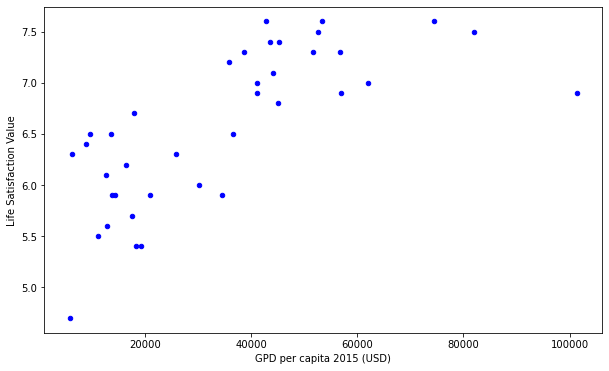

In [181]:
# I create a scatter plot for the data in the df1 dataframe.

df1.plot(kind="scatter", x="GPD per capita 2015 (USD)", y="Life Satisfaction Value", color="b", figsize=(10,6)) 

In [182]:
# I calculate the Pearson correlation coeffeicient r for the data in the df1 dataframe 
# and display the correlation dataframe.

df1.corr()

,Life Satisfaction Value,GPD per capita 2015 (USD)
Life Satisfaction Value,1.000000,0.720287
GPD per capita 2015 (USD),0.720287,1.000000


In [183]:
# I extract all values of the "GPD per capita 2015 (USD)" and "Life Satisfaction Value" columns and  
# form new (38x1) column arrays "a" and "b".

a=df1.loc[:, ["GPD per capita 2015 (USD)"]].values 
b=df1.loc[:, ["Life Satisfaction Value"]].values 

In [184]:
# I reshape the original (38x1) column arrary "a" to a (1x38) row array "X".

X=a.reshape(38) 

In [185]:
# I display the "X" array.

X

array([ 56755.72171242,  44178.04737774,  40991.80813814,  43585.51198178,
        17829.69832237,  53254.85637009,  42784.69836164,  36638.18492916,
        41086.72967373,  18167.77372717,  12706.89121489,  52564.42917946,
        61995.42280258,  30230.22630213,  34524.46986093, 101376.49657434,
         9616.64500569,  45175.23189338,  38615.99518491,  74355.51585756,
        12578.49547344,  19242.3664711 ,  16310.988409  ,  25732.01836475,
        51545.48360953,  82081.59716162,  11006.2497364 ,  44974.83187718,
        56839.38177423,   8814.00098681,  13574.17183072,  17522.23018625,
        35776.79516181,  13774.60527391,  20881.76692993,   5734.63362915,
         6175.8760297 ,  14258.22933451])

In [186]:
# I reshape the original (38x1) column "b" array to a (1x38) row array "y".

y=b.reshape(38) 

In [187]:
# I display the "y" array. 
y

array([7.3, 7.1, 6.9, 7.4, 6.7, 7.6, 7.6, 6.5, 7. , 5.4, 5.6, 7.5, 7. ,
       6. , 5.9, 6.9, 6.5, 7.4, 7.3, 7.6, 6.1, 5.4, 6.2, 6.3, 7.3, 7.5,
       5.5, 6.8, 6.9, 6.4, 6.5, 5.7, 7.2, 5.9, 5.9, 4.7, 6.3, 5.9])

In [188]:
# First, I assume a simple linear regression model for the data in "X" and "y" arrays 
# and calculate the slope, intercept etc., of the linear regression method. 
# Here I use the "stats" module of "Scipy" library and its linear regression built in method.

result = sp.stats.linregress(X, y)

In [189]:
# I print the results of the simple linear regression method.

print(result)

LinregressResult(slope=2.399629982572962e-05, intercept=5.741754353755319, rvalue=0.7202871953226535, pvalue=3.426556470065171e-07, stderr=3.851624914535906e-06, intercept_stderr=0.15853194959552191)


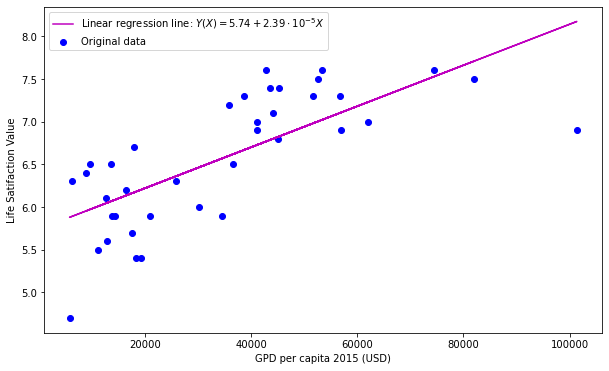

In [190]:
# I create a figure with a single subplot where the original data of the df1 dataframe 
# and the linear regression line Y(X) are shown.

fig, ax=plt.subplots(figsize=(10, 6))
ax.scatter(X, y, color='b', label="Original data")
ax.plot(X, result.intercept + (result.slope)*X, color="m", label="Linear regression line: $Y(X)=5.74+2.39\cdot 10^{-5} X$")
ax.set_xlabel("GPD per capita 2015 (USD)")
ax.set_ylabel("Life Satifaction Value")
plt.legend()

In [191]:
# I calculate the t-score in order to estimate the Confidence Intervals (CIs)
# of the linear regression coefficients "beta_0" and "beta_1" at significance 
# level of alpha=0.05 and Confidence Level (CL) of 95%. The number of degrees of freedom for the data is n=38. 

n=38
alpha=0.05
t_score = sp.stats.t.ppf(1-alpha/2, n-2) 
print(t)

2.0280940009804502


In [192]:
# Second, I use the KNN regression method to find a relationship between the data for K=5 (default value).

model=sklearn.neighbors.KNeighborsRegressor()

In [193]:
# I use the fit() function to fit the data of the KNN method
# and use the original column vectors "a" and "b" and redefine 
# them as "X1" and "y1" to use in the KNN regression method.

X1=a 
y1=b
model.fit(X1,y1)

KNeighborsRegressor()

In [194]:
# I calculate the predicted values of the KNN method for 
# the GDP data "X" not present in the df1 dataframe for the countries of Albania, United Arab Emirates and Armenia.

X_new=[[3607.296697],[38663.383807],[3607.296697]]

In [195]:
# I Print the predicted values of "Life Satisfaction Value" respectively 
# for Albania, United Arab Emirates and Armenia.

print(model.predict(X_new))

[[5.88]
 [6.98]
 [5.88]]


In [196]:
# I print the value of the generalized correlation coefficient R^2. 

print(model.score(X1, y1, sample_weight=None))

0.6961783837097522
